Представьте, что вы работаете аналитиком в очень крупной компании по доставке пиццы над приложением для курьеров (да, обычно в таких компаниях есть приложение для курьеров и отдельно приложение для потребителей).

У вас есть несколько ресторанов в разных частях города и целый штат курьеров. Но есть одна проблема, к вечеру скорость доставки падает из-за того, что курьеры уходят домой после рабочего дня, а количество заказов лишь растет. Это приводит к тому, что в момент пересмены наша доставка очень сильно проседает в эффективности. 

Наши data scientist-ы придумали новый алгоритм, который позволяет курьерам запланировать свои последние заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома. То есть, чтобы курьеры доставляли последние свои заказы за день как бы "по пути" домой. 

Вы вместе с командой решили раскатить A/B тест на две равные группы курьеров. Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении эту опцию и могут ее выбрать. Ваша задача – проанализировать данные эксперимента и помочь бизнесу принять решение о раскатке новой фичи на всех курьеров.

Описание данных

    -order_id - id заказа
    -delivery_time - время доставки в минутах
    -district - район доставки
    -experiment_group - экспериментальная группа

   - Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет
   - Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть    

In [60]:
import pandas as pd
import scipy.stats as sp
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(16,8)}, style = 'whitegrid')

In [27]:
experiment = pd.read_csv('https://stepik.org/media/attachments/lesson/385916/experiment_lesson_4.csv')
experiment.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [28]:
experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20196 entries, 0 to 20195
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          20196 non-null  int64  
 1   delivery_time     20196 non-null  float64
 2   district          20196 non-null  object 
 3   experiment_group  20196 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 631.2+ KB


In [29]:
experiment.describe()

,order_id,delivery_time
count,20196.000000,20196.000000
mean,11103.503565,42.054169
std,5835.424404,10.382196
min,1000.000000,10.000000
25%,6048.750000,35.000000
50%,11109.500000,42.000000
75%,16158.250000,49.000000
max,21207.000000,83.000000


In [14]:
experiment.experiment_group.value_counts()

test       10104
control    10092
Name: experiment_group, dtype: int64

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

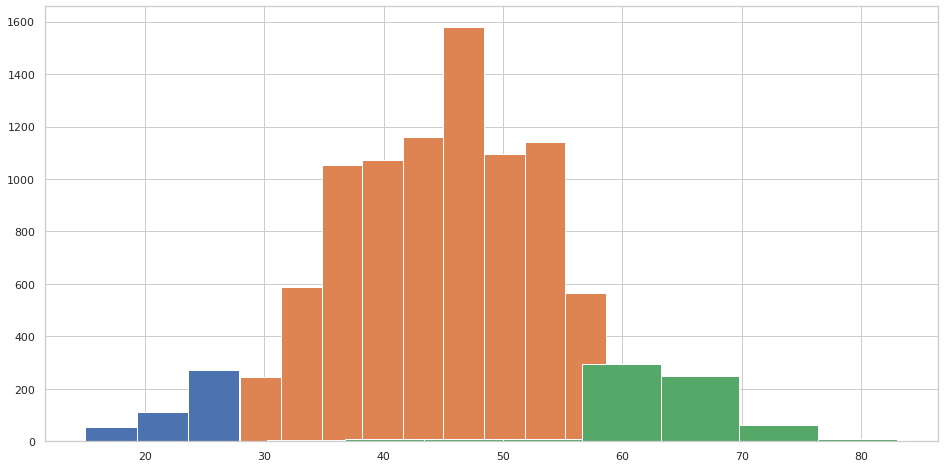

In [33]:
experiment[experiment.experiment_group == "control"].groupby('district').delivery_time.hist()
# график распределения времени для контрольной группы


district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

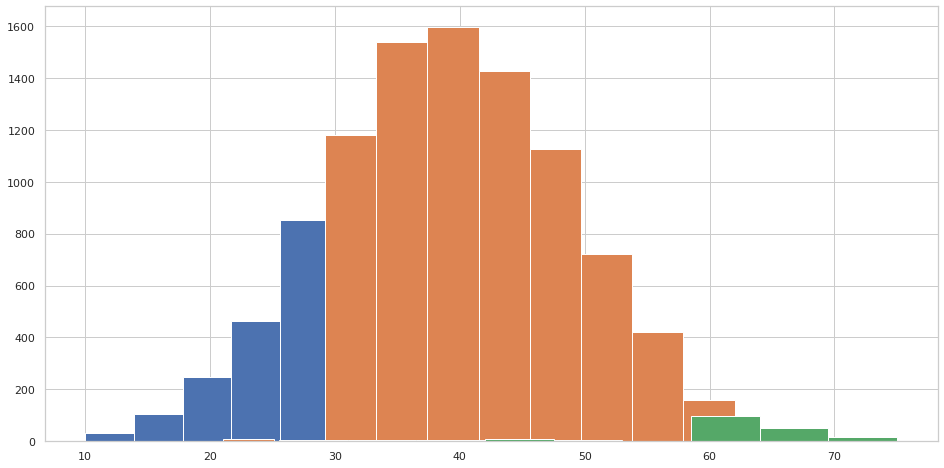

In [31]:
experiment[experiment.experiment_group == "test"].groupby('district').delivery_time.hist()
# график распределения времени для тестовой группы


2. Посчитайте количество наблюдений в тестовой и контрольной группе. На сколько по модулю отличается количество наблюдений в тесте и контроле?

In [38]:
number_of_observations_test = experiment[experiment.experiment_group == "test"].shape[0]
number_of_observations_test

10104

In [41]:
number_of_observations_control = experiment[experiment.experiment_group == "control"].shape[0]
number_of_observations_control

10092

In [42]:
number_of_observations_test-number_of_observations_control

12

3. Теперь давайте изучим наши распределения. Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте и в контроле.

    Обязательно сделайте семплирование перед применением критерия при проверке на нормальность (и для теста, и для контроля), так как на больших выборках вы можете получать неверные результаты.

In [ ]:
# Проверка выполнения условий на нормальность распределений

In [46]:
stats.shapiro(experiment[experiment['experiment_group'] == 'test'].delivery_time.sample(1000, random_state=17))

(0.9975479245185852, 0.14013493061065674)

In [47]:
stats.shapiro(experiment[experiment['experiment_group'] == 'control'].delivery_time.sample(1000, random_state=17))

(0.9974725842475891, 0.12411931157112122)

In [52]:
# стандартные отклонения 
std_control = experiment[experiment['experiment_group'] == 'control'].delivery_time.std().round(2)
std_test = experiment[experiment['experiment_group'] == 'test'].delivery_time.std().round(2)
print(std_control)
print(std_test)

9.99
9.88


Вывод: Для того, чтобы проверить нормальность распределения я использую 
Shapiro-Wilk test. Этот тест показывает, что значения в тестовой группе распределены нормально.В контрольной группе распределение является нормальным.
- Стандартное отклонение времени доставки в тесте равно 9.88.
- Стандартное отклонение времени доставки в контроле равно 9.99


 4. Пришло время сравнить средние в тесте и контроле. Внимание: здесь уже не нужно пользоваться методом .sample() - он нам нужен был только для теста Шапиро-Уилка, остальные тесты надо проводить на полных данных.

In [62]:
A = experiment[experiment['experiment_group'] == 'test'].delivery_time
B = experiment[experiment['experiment_group'] == 'control'].delivery_time

In [63]:
sp.ttest_ind(A, B)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

Для сравнения средних в данных экспериментальных группах я использую Student's t-test
 Статистика в тесте равна (округлите до целого) 43. p-value <= 0.05.
 Вывод: различия статистически значимы
 


5. На сколько процентов изменилось среднее время доставки в тестовой группе (округлите до сотых)? 

In [73]:
Mu_test = A.mean()
Mu_cotrol = B.mean()
Difference = round((Mu_test / Mu_cotrol - 1) * 100, 2)
print(Mu_test, Mu_cotrol, Difference, sep = '\n')

39.04681314330958
45.065101070154576
-13.35


Среднее время доставки изменилось в тестовой группе на 13.35 процентов по сравнению с контрольной

Итог: Используем новый алгоритм на всех, так как среднее время доставки статистически значимо изменилось. Среднее время доставки в тесте меньше, чем в контроле.